<a href="https://colab.research.google.com/github/gilangarisptr/NLP/blob/main/Chapter3_Foundational_Components_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Di chapter ini kita akan belajar dasar-dasar neural network seperti fungsi aktivasi, *loss function*, optimisasi, dan setup pelatihan untuk *supervised learning*. kita mulai materi pada chapter ini dengan pengenalan perceptron kemudian dilanjutkan dengan membuat jaringan neural. oiya pada materi ini kita menggunakan bahasa pemrograman python dan framework pytorch!

# The Perceptron: The simplest neural network

perceptron adalah unit paling sederhana dari jaringan neural network. (tapi gak sesederhaa mengingat mantan :(( ) lanjoot. konsep dari perceptron ini sebenernya mirip dengan jaringan neural yaitu ada input dan output, sebuah sinyak mengalir dari input ke output. prosesnya dapat dilihat pada gambar di bawah ini.

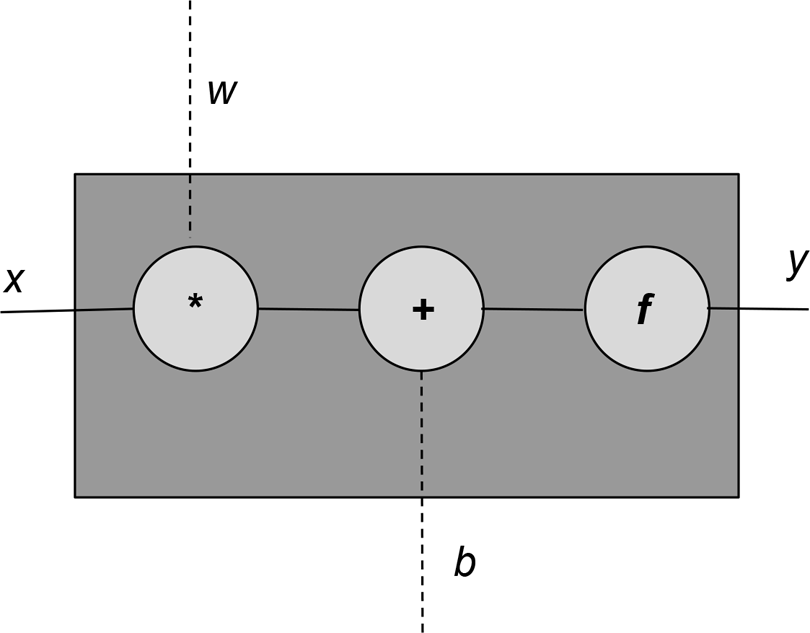


masing-masing perceptron memiliki input(x), output(y), bobot(w), bias(b), dan fungsi aktivasi (f). nilai bobot dan bias didapatkan dari hasil 'pembelajaran' dia terhadap data sedangkan fungsi aktivasi itu kita sendiri yang menentukan dan cara menentukannya tergantung terhadap jenis datanya, fungsinya, outputnya, dll. (banyak pokokknya bisa dicari sendiri). melihat hal itu maka, fungsi keluaran dapat dibentuk persamaan matematikanya seperti:

*y = f(wx + b)*

jangan kebanyakan teori cuss langsung kita coba aja membuat perceptron dengan framework pytorch.

In [4]:
import torch
import torch.nn as nn

In [5]:
class Perceptron(nn.Module):
  """ Perceptron  is one linear layer """
  def __init__(self, input_dim):
    """
    Args: input_dim(int) : size of the input features
    """
    super(Perceptron, self).__init__()
    self.fcl = nn.Linear(input_dim, 1)
  
  def forward(self, x_in):
    """ The forward pass of the perceptron
    args:
      x_in (torch.Tensor) : an input data tensor
      x_in.shape should be (batch, num_features)
    returns:
      resulting tensor. tensor.shape should be (batch,).
    """
    return torch.sigmoid(self.fcl(x_in).squeeze())

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


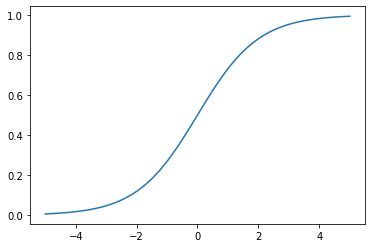

In [ ]:
# sigmoid function

import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


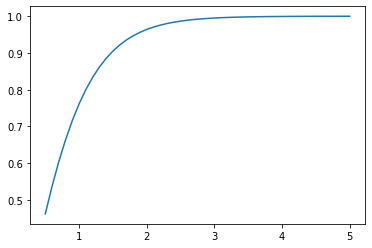

In [ ]:
# tanh activation function

w = torch.range(.5,5., 0.1)
h = torch.tanh(w)
plt.plot(w.numpy(), h.numpy())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


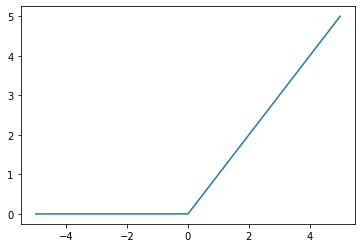

In [ ]:
# relu

relu = torch.nn.ReLU()
x = torch.range(-5.,5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


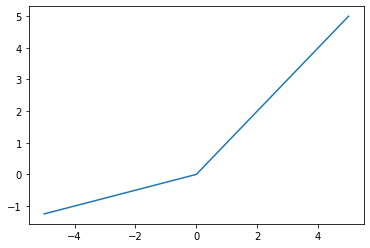

In [ ]:
# parametric relu PReLU activation

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

In [ ]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 9.1120e-05, -3.9981e-01,  7.2704e-02]])
tensor([[0.3642, 0.2442, 0.3916]])
tensor([1.0000])


## Loss function

### Mean Squared Error Loss

In [ ]:
mse_loss = nn.MSELoss()
output = torch.randn(3,5, requires_grad=True)
target = torch.randn(3,5)
loss = mse_loss(output, target)
print(output)
print(target)
print(loss)

tensor([[ 0.4064,  1.0171, -0.8390,  0.3534,  0.4771],
        [-0.0545,  0.1785, -0.5909,  0.2173,  1.1353],
        [-0.5628,  0.8114,  0.4885,  0.2875,  0.8990]], requires_grad=True)
tensor([[ 2.3817, -0.2603, -0.6615, -0.2895, -1.2545],
        [ 0.9370, -1.0565, -0.3790, -2.0037,  0.3182],
        [ 0.2264,  0.5717,  0.2662, -1.6400,  0.1854]])
tensor(1.4723, grad_fn=<MseLossBackward>)


## Caetorical Cross Entropy

categorical cross entropy secara tipikal diunakan untuk multiclass classification yang outputnya adalah interpretasi masing-masing probabilitas pada kelasnya. 

In [ ]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
output = torch.randn(3,5,requires_grad=True)
target = torch.tensor([1,0,3], dtype=torch.int64)
loss = ce_loss(output,target)

print(loss)

tensor(1.1881, grad_fn=<NllLossBackward>)


## Binary Cross-Entropy Loss

categorical cross-entropy yang sudah kita jelaskan di atas itu bagus ketika mememecahkan permasalahan multiple class. terkadang kita hanya perlu menyelesaikan permasalahan yang hanya memiliki 2 kelas atau biasa disebut sebagai binary classification. maka dari itu ketika kita menemukan masalah tersebut maka akan lebih baik jika menggunakan binary cross entropy (BCE)

In [ ]:
bce_loss = nn.BCELoss()

sigmoid = nn.Sigmoid()
prob = sigmoid(torch.randn(4,1,requires_grad=True))
target = torch.tensor([1,0,1,0],  dtype=torch.float32).view(4,1)
loss= bce_loss(prob, target)

print(prob)

print(loss)

tensor([[0.4904],
        [0.7212],
        [0.5039],
        [0.4738]], grad_fn=<SigmoidBackward>)
tensor(0.8293, grad_fn=<BinaryCrossEntropyBackward>)


# Deep Dive Into Supervised Training

Supervised learning adalah salah satu cabang ML yang menyelesaikan permasalahan dengan data yang ada. secara spesifik,kita akan belajar untuk menggunakan prediksi model dan loss function untuk melakukan optimisasi pada gradient.

mereview materi pada chapter 1, supervised learning membutuhkan beberapa hal diantaranya : model, loss function, training daa, dan algoritma optimisasi. tujuan dari proses training adalah untuk menggunakan optimisasi gradient descent sehingga menjadikan model pembelajaran memiliki nilai loss seminimal mungkin. 

contoh kasus:

diberika suatu data biner yang memiliki dua buah kelas. kita diminta untuk membuat model ML. dengan data yang ada maka ada beberapa hal yang harus kita perhatikan yaitu:
1. memilih model
  
  untuk memilih model yang tepat pada kasus ini karena datanya sedikit dan tidak terlalu kompleks maka, kita dapat menggunakan simple perceptron dengan fungsi aktivasi sigmoid. kenapa fungsi aktivasi sigmoid karena kita memiliki data dengan target biner (0 dan 1)

2. convert probabilities to discrete classes
   
  pada beberapa binary classification, kita bisa mengubah probabilitas output menjadi 2 nilai kelas diskrit dengan menggunakan / menerapkan decision boundary. jika probabilitas P(y=1||x) > threshold_boundary, maka predicted class akan bernilai 1, sebaliknya akan bernilai 0. umumnya decision boundary atau nilai threshold yang dipakai adalah 0.5

3. memilih parameter optimisasi
  
  parameter optimisasi tidak terlepas dari 2 hal yaitu teknik algoritma optimisasi pada gradien dan pada nilai loss. untuk optimisasi gradient pilihan default kita dapat menggunakan SGD(stochasic gradient descent) akan tetapi jika menggunakan SGD kita akan sering mengalami convergence issue (conv issue adalah masalah ketika gradient "menyerah") sehingga menghasilkan model yang tidak baik (nilai loss masih cukup tinggi). opsi lain yang dapat digunakan adalah Adagrad dan Adam optimization. pada kasus ini kita dapat menggunakan Adam Optimization denggan nilai learning rate default sebesar 0.001. 

In [1]:
import torch 
import torch.optim as optim

In [6]:
input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

Gradient-Based Supervised Learning

proses training dimulai dengan menghitung loss, yaitu mengukur berapa perbedaan antara model prediksi dengan target. sedangkan nilai gradient dari loss function berfungsi untuk menentukan berapa banyak parameter-parameter yang harus diubah. cara kerja dari Gradient based learning adalah seperti seseorang yang berjalan menuruni bukit. orang yang berjalan dapat kita sebut sebagai parameter, sedangkan seberapa besar dia melangkah disebut gradient. kecepatan dia melangkah disebut learning rate. dan tujuannya disdebut target.

In [ ]:
# each epoch is a complete pass over the training data
for epoch_i in range(n_epochs):
    # the inner loop is over the batches in the dataset
    for batch_i in range(n_batches):
        # Step 0: Get the data
        x_data, y_target = get_toy_data(batch_size)
        # Step 1: Clear the gradients
        perceptron.zero_grad()
        # Step 2: Compute the forward pass of the model
        y_pred = perceptron(x_data, apply_sigmoid=True)
        # Step 3: Compute the loss value that we wish to optimize
        loss = bce_loss(y_pred, y_target)
        # Step 4: Propagate the loss signal backward
        loss.backward()
        # Step 5: Trigger the optimizer to perform one update
        optimizer.step()

Core idea dari supervised gradient-based learning dapat disimpulkan :
  1. tentukan model
  2. tentukan loss function untuk menghitung gradient
  3. terapkan optimisasi untuk melakukan update pada parameter hasil gradient


  terlepas dari core-idea itu, ada beberapa konsep dasar yang perlu kita ketahui juga yaitu :
  1. evaluation metrics
  2. splitting dataset
  3. tuning hypreparameter
  4. regularization